In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import arrow
import boxball_loader as bbl

In [2]:
bat_yrs = bbl.load_batting(years=range(2000, 3000), player_types=bbl.PlayerType.POSITION, coalesce_type=bbl.CoalesceMode.PLAYER_SEASON)
bat_yrs.shape

(13155, 17)

In [3]:
bat_yrs.sample(10)

,,g,ab,r,h,_2b,_3b,hr,rbi,sb,cs,bb,so,ibb,hbp,sh,sf,gidp
player_id,yr,,,,,,,,,,,,,,,,,
adamewi01,2018,85,288,43,80,7,0,10,34.0,6.0,5.0,31,95.0,3.0,1.0,1.0,2.0,6.0
oltmi01,2015,30,94,7,18,0,0,4,5.0,0.0,1.0,7,35.0,0.0,1.0,0.0,0.0,2.0
piscost01,2015,63,233,29,71,15,4,7,39.0,2.0,1.0,20,56.0,2.0,1.0,0.0,2.0,7.0
bergda01,2002,109,374,42,101,26,2,4,39.0,0.0,2.0,26,57.0,1.0,5.0,4.0,5.0,6.0
bixlebr01,2009,18,44,5,10,5,0,0,3.0,1.0,0.0,2,26.0,0.0,0.0,0.0,0.0,0.0
sadledo01,2002,73,98,16,16,2,1,0,7.0,5.0,3.0,7,19.0,0.0,2.0,1.0,1.0,1.0
wilsobo02,2009,12,5,0,1,1,0,0,0.0,0.0,0.0,0,1.0,0.0,0.0,1.0,0.0,1.0
panikjo01,2019,142,438,50,107,21,2,5,39.0,4.0,2.0,43,47.0,2.0,4.0,2.0,4.0,6.0
rodriiv01,2001,111,442,70,136,24,2,25,65.0,10.0,3.0,23,73.0,3.0,4.0,0.0,1.0,13.0


In [4]:
ppl = bbl.load_people()
ppl.columns

Index(['player_id', 'birth_year', 'birth_month', 'birth_day', 'birth_country',
       'birth_state', 'birth_city', 'death_year', 'death_month', 'death_day',
       'death_country', 'death_state', 'death_city', 'name_first', 'name_last',
       'name_given', 'weight', 'height', 'bats', 'throws', 'debut',
       'final_game', 'retro_id', 'bbref_id'],
      dtype='object')

In [5]:
birthdates = ppl.loc[:, ['player_id', 'birth_year', 'birth_month', 'birth_day']]

In [6]:
batters = pd.merge(left=bat_yrs.reset_index(), right=birthdates, on='player_id')
batters.shape

(13155, 22)

In [7]:
batters.columns.values

array(['player_id', 'yr', 'g', 'ab', 'r', 'h', '_2b', '_3b', 'hr', 'rbi',
       'sb', 'cs', 'bb', 'so', 'ibb', 'hbp', 'sh', 'sf', 'gidp',
       'birth_year', 'birth_month', 'birth_day'], dtype=object)

In [8]:
batters

,player_id,yr,g,ab,r,h,_2b,_3b,hr,rbi,...,bb,so,ibb,hbp,sh,sf,gidp,birth_year,birth_month,birth_day
0,abadan01,2001,1,1,0,0,0,0,0,0.0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,1972.0,8.0,25.0
1,abadan01,2003,9,17,1,2,0,0,0,0.0,...,2,5.0,0.0,0.0,0.0,0.0,1.0,1972.0,8.0,25.0
2,abadan01,2006,5,3,0,0,0,0,0,0.0,...,2,0.0,0.0,0.0,0.0,0.0,0.0,1972.0,8.0,25.0
3,abbotje01,2000,80,215,31,59,15,1,3,29.0,...,21,38.0,1.0,2.0,2.0,1.0,2.0,1972.0,8.0,17.0
4,abbotje01,2001,28,42,5,11,3,0,0,5.0,...,3,7.0,0.0,1.0,0.0,0.0,1.0,1972.0,8.0,17.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13150,zuninmi01,2016,55,164,16,34,7,0,12,31.0,...,21,65.0,0.0,6.0,0.0,1.0,0.0,1991.0,3.0,25.0
13151,zuninmi01,2017,124,387,52,97,25,0,25,64.0,...,39,160.0,0.0,8.0,0.0,1.0,8.0,1991.0,3.0,25.0
13152,zuninmi01,2018,113,373,37,75,18,0,20,44.0,...,24,150.0,0.0,6.0,0.0,2.0,7.0,1991.0,3.0,25.0
13153,zuninmi01,2019,90,266,30,44,10,1,9,32.0,...,20,98.0,0.0,3.0,0.0,0.0,4.0,1991.0,3.0,25.0


In [9]:
def compute_age(b):
    return (arrow.Arrow(b.yr,7,1)-arrow.Arrow(int(b.birth_year), int(b.birth_month), int(b.birth_day))).days/365.24

In [10]:
batters['age'] = batters.apply(compute_age, axis=1)

In [11]:
batters['pa'] = batters.ab + batters.bb + batters.hbp + batters.sh + batters.sf - batters.ibb

In [12]:
batters['bb_rate'] = (batters.bb-batters.ibb)/batters.pa

In [13]:
batters

,player_id,yr,g,ab,r,h,_2b,_3b,hr,rbi,...,hbp,sh,sf,gidp,birth_year,birth_month,birth_day,age,pa,bb_rate
0,abadan01,2001,1,1,0,0,0,0,0,0.0,...,0.0,0.0,0.0,0.0,1972.0,8.0,25.0,28.849524,1.0,0.000000
1,abadan01,2003,9,17,1,2,0,0,0,0.0,...,0.0,0.0,0.0,1.0,1972.0,8.0,25.0,30.848209,19.0,0.105263
2,abadan01,2006,5,3,0,0,0,0,0,0.0,...,0.0,0.0,0.0,0.0,1972.0,8.0,25.0,33.848976,5.0,0.400000
3,abbotje01,2000,80,215,31,59,15,1,3,29.0,...,2.0,2.0,1.0,2.0,1972.0,8.0,17.0,27.872084,240.0,0.083333
4,abbotje01,2001,28,42,5,11,3,0,0,5.0,...,1.0,0.0,0.0,1.0,1972.0,8.0,17.0,28.871427,46.0,0.065217
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13150,zuninmi01,2016,55,164,16,34,7,0,12,31.0,...,6.0,0.0,1.0,0.0,1991.0,3.0,25.0,25.271055,192.0,0.109375
13151,zuninmi01,2017,124,387,52,97,25,0,25,64.0,...,8.0,0.0,1.0,8.0,1991.0,3.0,25.0,26.270398,435.0,0.089655
13152,zuninmi01,2018,113,373,37,75,18,0,20,44.0,...,6.0,0.0,2.0,7.0,1991.0,3.0,25.0,27.269740,405.0,0.059259
13153,zuninmi01,2019,90,266,30,44,10,1,9,32.0,...,3.0,0.0,0.0,4.0,1991.0,3.0,25.0,28.269083,289.0,0.069204


<AxesSubplot:xlabel='age', ylabel='bb_rate'>

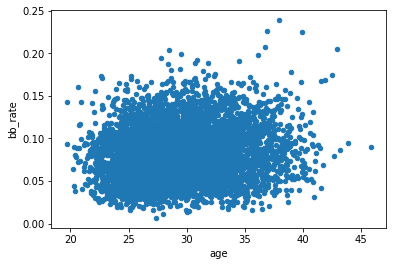

In [14]:
batters.query('pa>=300').plot.scatter(x='age', y='bb_rate')

In [15]:
batters['age_int'] = batters.age.apply(int)

<AxesSubplot:xlabel='age_int'>

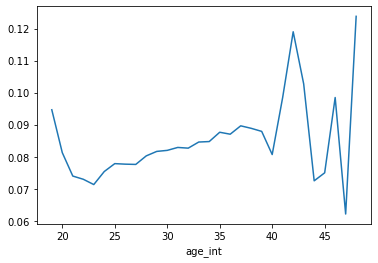

In [16]:
by_age = batters[batters['pa']>=100].groupby(['age_int']).sum()
((by_age.bb-by_age.ibb)/by_age.pa).plot()

In [17]:
# Use this to compute year-average BB rate, over non-pitchers
yr_totals = batters.groupby('yr')[['pa', 'bb', 'ibb']].sum()
yr_totals

,pa,bb,ibb
yr,,,
2000,182726.0,18015,1210.0
2001,179480.0,15622,1384.0
2002,179100.0,16057,1452.0
2003,180041.0,15696,1316.0
2004,181061.0,16024,1381.0
2005,178931.0,15018,1216.0
2006,180595.0,15647,1410.0
2007,181323.0,15898,1323.0
2008,180326.0,16104,1310.0


In [18]:
yr_totals['bb_rt'] = (yr_totals.bb-(yr_totals.ibb*0.5))/yr_totals.pa
yr_totals

,pa,bb,ibb,bb_rt
yr,,,,
2000,182726.0,18015,1210.0,0.095279
2001,179480.0,15622,1384.0,0.083185
2002,179100.0,16057,1452.0,0.085600
2003,180041.0,15696,1316.0,0.083525
2004,181061.0,16024,1381.0,0.084687
2005,178931.0,15018,1216.0,0.080534
2006,180595.0,15647,1410.0,0.082738
2007,181323.0,15898,1323.0,0.084030
2008,180326.0,16104,1310.0,0.085673


<AxesSubplot:xlabel='yr'>

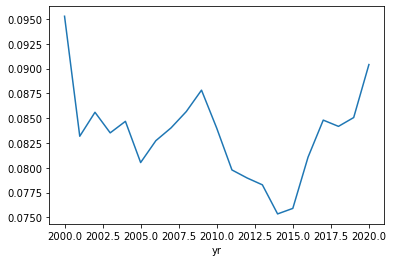

In [19]:
yr_totals.bb_rt.plot()

In [20]:
batters.shape

(13155, 26)

In [23]:
def get_pairs_consecutive_seasons(seasons, min_pa):
    s = seasons.loc[seasons.pa>=min_pa]
    pairs = pd.merge(left=s, right=s, on='player_id')
    cons_pairs = pairs.loc[(pairs.yr_x-pairs.yr_y==1)]
    return cons_pairs
    

In [24]:
pairs = get_pairs_consecutive_seasons(batters, 500)
pairs

,player_id,yr_x,g_x,ab_x,r_x,h_x,_2b_x,_3b_x,hr_x,rbi_x,...,sh_y,sf_y,gidp_y,birth_year_y,birth_month_y,birth_day_y,age_y,pa_y,bb_rate_y,age_int_y
13,abreubo01,2001,162,588,118,170,48,4,31,110.0,...,0.0,3.0,12.0,1974.0,3.0,11.0,26.308729,671.0,0.135618,26
26,abreubo01,2002,157,572,102,176,50,6,20,85.0,...,0.0,9.0,13.0,1974.0,3.0,11.0,27.308071,693.0,0.137085,27
39,abreubo01,2003,158,577,99,173,35,1,20,101.0,...,0.0,6.0,11.0,1974.0,3.0,11.0,28.307414,676.0,0.140533,28
52,abreubo01,2004,159,574,118,173,47,1,30,105.0,...,0.0,7.0,13.0,1974.0,3.0,11.0,29.306757,682.0,0.140762,29
65,abreubo01,2005,162,588,104,168,37,1,24,102.0,...,0.0,7.0,5.0,1974.0,3.0,11.0,30.308838,703.0,0.166430,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18859,zobribe01,2012,157,560,88,151,39,7,20,74.0,...,2.0,5.0,9.0,1981.0,5.0,26.0,30.098018,673.0,0.112927,30
18869,zobribe01,2013,157,612,77,168,36,3,12,71.0,...,2.0,6.0,13.0,1981.0,5.0,26.0,31.100099,661.0,0.136157,31
18879,zobribe01,2014,146,570,83,155,34,3,10,52.0,...,1.0,6.0,18.0,1981.0,5.0,26.0,32.099441,694.0,0.097983,32
18889,zobribe01,2015,126,467,76,129,36,3,13,56.0,...,2.0,6.0,8.0,1981.0,5.0,26.0,33.098784,650.0,0.109231,33


In [25]:
pairs.player_id.value_counts()

pujolal01    14
beltrad01    14
suzukic01    12
jeterde01    12
rolliji01    12
             ..
peralda01     1
espinda01     1
fordle01      1
martile01     1
johnsni01     1
Name: player_id, Length: 493, dtype: int64

In [26]:
pairs.columns.values

array(['player_id', 'yr_x', 'g_x', 'ab_x', 'r_x', 'h_x', '_2b_x', '_3b_x',
       'hr_x', 'rbi_x', 'sb_x', 'cs_x', 'bb_x', 'so_x', 'ibb_x', 'hbp_x',
       'sh_x', 'sf_x', 'gidp_x', 'birth_year_x', 'birth_month_x',
       'birth_day_x', 'age_x', 'pa_x', 'bb_rate_x', 'age_int_x', 'yr_y',
       'g_y', 'ab_y', 'r_y', 'h_y', '_2b_y', '_3b_y', 'hr_y', 'rbi_y',
       'sb_y', 'cs_y', 'bb_y', 'so_y', 'ibb_y', 'hbp_y', 'sh_y', 'sf_y',
       'gidp_y', 'birth_year_y', 'birth_month_y', 'birth_day_y', 'age_y',
       'pa_y', 'bb_rate_y', 'age_int_y'], dtype=object)

In [27]:
X = pairs['bb_rate_x']
y = pairs['bb_rate_y']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              bb_rate_y   R-squared:                       0.608
Model:                            OLS   Adj. R-squared:                  0.608
Method:                 Least Squares   F-statistic:                     2841.
Date:                Fri, 04 Mar 2022   Prob (F-statistic):               0.00
Time:                        15:35:35   Log-Likelihood:                 4608.4
No. Observations:                1833   AIC:                            -9213.
Df Residuals:                    1831   BIC:                            -9202.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0184      0.001     13.983      0.000       0.016       0.021
bb_rate_x      0.7793      0.015     53.303      0.000       0.751       0.808
==============================================================================
Omnibus:                       44.619   Durbin-Watson:                   2.345
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               48.252
Skew:                           0.362   Prob(JB):                     3.33e-11
Kurtosis:                       3.328   Cond. No.                         32.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [28]:
model.params

const        0.018401
bb_rate_x    0.779259
dtype: float64

In [29]:
def run_regression(batters, min_pa):
    pairs = get_pairs_consecutive_seasons(batters, min_pa)
    X = pairs['bb_rate_x']
    y = pairs['bb_rate_y']
    X = sm.add_constant(X)
    model = sm.OLS(y, X).fit()
    ret = model.params
    ret['r2'] = model.rsquared_adj
    return ret 
    

In [30]:
run_regression(batters, 500)

const        0.018401
bb_rate_x    0.779259
r2           0.607896
dtype: float64

In [31]:
pd.DataFrame.from_dict({min_pa: run_regression(batters, min_pa) for min_pa in (1, 100, 300, 500)}).T

,const,bb_rate_x,r2
1,0.050680,0.323146,0.112757
100,0.026300,0.666136,0.447271
300,0.020401,0.747733,0.559540
500,0.018401,0.779259,0.607896


In [32]:
# OK, let's compute predictions for these pairs.  Then we'll look at over-underperformance by age
pairs = get_pairs_consecutive_seasons(batters, 300)
X = pairs['bb_rate_x']
y = pairs['bb_rate_y']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
pairs['bb_rate_y_predicted'] = model.predict(X)
pairs

,player_id,yr_x,g_x,ab_x,r_x,h_x,_2b_x,_3b_x,hr_x,rbi_x,...,sf_y,gidp_y,birth_year_y,birth_month_y,birth_day_y,age_y,pa_y,bb_rate_y,age_int_y,bb_rate_y_predicted
2,abernbr01,2002,117,463,46,112,18,4,2,40.0,...,1.0,3.0,1977.0,9.0,23.0,23.770671,334.0,0.077844,23,0.057491
16,abreubo01,2001,162,588,118,170,48,4,31,110.0,...,3.0,12.0,1974.0,3.0,11.0,26.308729,671.0,0.135618,26,0.122904
29,abreubo01,2002,157,572,102,176,50,6,20,85.0,...,9.0,13.0,1974.0,3.0,11.0,27.308071,693.0,0.137085,27,0.125482
42,abreubo01,2003,158,577,99,173,35,1,20,101.0,...,6.0,11.0,1974.0,3.0,11.0,28.307414,676.0,0.140533,28,0.125654
55,abreubo01,2004,159,574,118,173,47,1,30,105.0,...,7.0,13.0,1974.0,3.0,11.0,29.306757,682.0,0.140762,29,0.144846
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39857,zobribe01,2016,147,523,94,142,31,3,18,76.0,...,5.0,8.0,1981.0,5.0,26.0,34.098127,532.0,0.110902,34,0.128075
39868,zobribe01,2017,128,435,58,101,20,3,12,50.0,...,4.0,17.0,1981.0,5.0,26.0,35.100208,625.0,0.144000,35,0.099110
39879,zobribe01,2018,139,455,67,139,28,3,9,58.0,...,3.0,13.0,1981.0,5.0,26.0,36.099551,494.0,0.105263,36,0.098200
39885,zuninmi01,2015,112,350,28,61,11,0,11,28.0,...,4.0,12.0,1991.0,3.0,25.0,23.269631,475.0,0.033684,23,0.061081


In [33]:
pairs['bb_rate_overperform'] = pairs.bb_rate_y/pairs.bb_rate_y_predicted
pairs

,player_id,yr_x,g_x,ab_x,r_x,h_x,_2b_x,_3b_x,hr_x,rbi_x,...,gidp_y,birth_year_y,birth_month_y,birth_day_y,age_y,pa_y,bb_rate_y,age_int_y,bb_rate_y_predicted,bb_rate_overperform
2,abernbr01,2002,117,463,46,112,18,4,2,40.0,...,3.0,1977.0,9.0,23.0,23.770671,334.0,0.077844,23,0.057491,1.354022
16,abreubo01,2001,162,588,118,170,48,4,31,110.0,...,12.0,1974.0,3.0,11.0,26.308729,671.0,0.135618,26,0.122904,1.103448
29,abreubo01,2002,157,572,102,176,50,6,20,85.0,...,13.0,1974.0,3.0,11.0,27.308071,693.0,0.137085,27,0.125482,1.092468
42,abreubo01,2003,158,577,99,173,35,1,20,101.0,...,11.0,1974.0,3.0,11.0,28.307414,676.0,0.140533,28,0.125654,1.118409
55,abreubo01,2004,159,574,118,173,47,1,30,105.0,...,13.0,1974.0,3.0,11.0,29.306757,682.0,0.140762,29,0.144846,0.971807
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39857,zobribe01,2016,147,523,94,142,31,3,18,76.0,...,8.0,1981.0,5.0,26.0,34.098127,532.0,0.110902,34,0.128075,0.865918
39868,zobribe01,2017,128,435,58,101,20,3,12,50.0,...,17.0,1981.0,5.0,26.0,35.100208,625.0,0.144000,35,0.099110,1.452932
39879,zobribe01,2018,139,455,67,139,28,3,9,58.0,...,13.0,1981.0,5.0,26.0,36.099551,494.0,0.105263,36,0.098200,1.071926
39885,zuninmi01,2015,112,350,28,61,11,0,11,28.0,...,12.0,1991.0,3.0,25.0,23.269631,475.0,0.033684,23,0.061081,0.551468


,bb_rate_overperform,pa_y
age_int_y,,
19,0.947776,1081.0
20,0.932154,5974.0
21,0.973263,18454.0
22,0.990576,51205.0
23,0.922478,88276.0
24,0.951026,134757.0
25,0.992483,188652.0
26,0.982459,203030.0
27,0.984228,205696.0


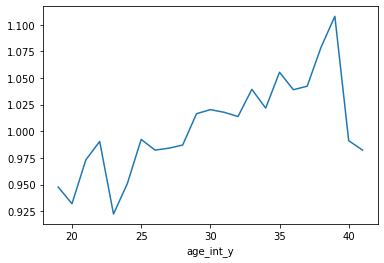

In [34]:
bb_age_curve = pairs.groupby('age_int_y').agg({'bb_rate_overperform': np.mean, 'pa_y': np.sum})
bb_age_curve.bb_rate_overperform.plot()
bb_age_curve

In [35]:
# Now let's apply the age adjustments to the predictions, and see what we see
pairs = pd.merge(left=pairs, right=bb_age_curve.bb_rate_overperform.rename('bb_rate_age_adjust'), on='age_int_y')
pairs

,player_id,yr_x,g_x,ab_x,r_x,h_x,_2b_x,_3b_x,hr_x,rbi_x,...,birth_year_y,birth_month_y,birth_day_y,age_y,pa_y,bb_rate_y,age_int_y,bb_rate_y_predicted,bb_rate_overperform,bb_rate_age_adjust
0,abernbr01,2002,117,463,46,112,18,4,2,40.0,...,1977.0,9.0,23.0,23.770671,334.0,0.077844,23,0.057491,1.354022,0.922478
1,ackledu01,2012,153,607,84,137,22,2,12,50.0,...,1988.0,2.0,26.0,23.343555,375.0,0.104000,23,0.079224,1.312727,0.922478
2,almoral01,2018,152,444,62,127,24,1,5,41.0,...,1994.0,4.0,16.0,23.209397,322.0,0.055901,23,0.056380,0.991497,0.922478
3,altuvjo01,2014,158,660,85,225,47,3,7,59.0,...,1990.0,5.0,6.0,23.154638,667.0,0.040480,23,0.051379,0.787870,0.922478
4,anderti01,2017,146,587,72,151,26,4,17,56.0,...,1993.0,6.0,23.0,23.023218,431.0,0.030162,23,0.036442,0.827689,0.922478
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3881,bondsba01,2007,126,340,75,94,14,0,28,66.0,...,1964.0,7.0,24.0,41.936809,455.0,0.169231,41,0.173738,0.974057,0.982438
3882,henderi01,2001,123,379,70,86,17,3,8,42.0,...,1958.0,12.0,25.0,41.517906,518.0,0.167954,41,0.150651,1.114849,0.982438
3883,suzukic01,2016,143,327,48,95,15,5,1,22.0,...,1973.0,10.0,22.0,41.690395,437.0,0.068650,41,0.079973,0.858410,0.982438
3884,harpebr03,2013,118,424,71,116,24,3,20,58.0,...,1992.0,10.0,16.0,19.707590,597.0,0.093802,19,0.106853,0.877863,0.947776


In [36]:
pairs['bb_rate_y_age_predicted'] = pairs.bb_rate_y_predicted * pairs.bb_rate_age_adjust
pairs

,player_id,yr_x,g_x,ab_x,r_x,h_x,_2b_x,_3b_x,hr_x,rbi_x,...,birth_month_y,birth_day_y,age_y,pa_y,bb_rate_y,age_int_y,bb_rate_y_predicted,bb_rate_overperform,bb_rate_age_adjust,bb_rate_y_age_predicted
0,abernbr01,2002,117,463,46,112,18,4,2,40.0,...,9.0,23.0,23.770671,334.0,0.077844,23,0.057491,1.354022,0.922478,0.053034
1,ackledu01,2012,153,607,84,137,22,2,12,50.0,...,2.0,26.0,23.343555,375.0,0.104000,23,0.079224,1.312727,0.922478,0.073083
2,almoral01,2018,152,444,62,127,24,1,5,41.0,...,4.0,16.0,23.209397,322.0,0.055901,23,0.056380,0.991497,0.922478,0.052009
3,altuvjo01,2014,158,660,85,225,47,3,7,59.0,...,5.0,6.0,23.154638,667.0,0.040480,23,0.051379,0.787870,0.922478,0.047396
4,anderti01,2017,146,587,72,151,26,4,17,56.0,...,6.0,23.0,23.023218,431.0,0.030162,23,0.036442,0.827689,0.922478,0.033617
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3881,bondsba01,2007,126,340,75,94,14,0,28,66.0,...,7.0,24.0,41.936809,455.0,0.169231,41,0.173738,0.974057,0.982438,0.170687
3882,henderi01,2001,123,379,70,86,17,3,8,42.0,...,12.0,25.0,41.517906,518.0,0.167954,41,0.150651,1.114849,0.982438,0.148006
3883,suzukic01,2016,143,327,48,95,15,5,1,22.0,...,10.0,22.0,41.690395,437.0,0.068650,41,0.079973,0.858410,0.982438,0.078569
3884,harpebr03,2013,118,424,71,116,24,3,20,58.0,...,10.0,16.0,19.707590,597.0,0.093802,19,0.106853,0.877863,0.947776,0.101273


In [37]:
pairs['bb_rate_age_overperform'] = pairs.bb_rate_y/pairs.bb_rate_y_age_predicted
pairs.groupby('age_int_y').bb_rate_age_overperform.mean()


age_int_y
19    1.0
20    1.0
21    1.0
22    1.0
23    1.0
24    1.0
25    1.0
26    1.0
27    1.0
28    1.0
29    1.0
30    1.0
31    1.0
32    1.0
33    1.0
34    1.0
35    1.0
36    1.0
37    1.0
38    1.0
39    1.0
40    1.0
41    1.0
Name: bb_rate_age_overperform, dtype: float64

In [38]:
# OK, that didn't tell us much of anything
# Let's instead look at the r-squareds of the predictions
X = pairs['bb_rate_y_predicted']
y = pairs['bb_rate_y']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              bb_rate_y   R-squared:                       0.560
Model:                            OLS   Adj. R-squared:                  0.560
Method:                 Least Squares   F-statistic:                     4936.
Date:                Fri, 04 Mar 2022   Prob (F-statistic):               0.00
Time:                        15:35:36   Log-Likelihood:                 9622.0
No. Observations:                3886   AIC:                        -1.924e+04
Df Residuals:                    3884   BIC:                        -1.923e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const               -1.015e-16      0.001  -8.42e-14      1.000      -0.002       0.002
bb_rate_y_predicted     1.0000      0.014     70.259      0.000       0.972       1.028
==============================================================================
Omnibus:                       96.016   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              106.727
Skew:                           0.358   Prob(JB):                     6.68e-24
Kurtosis:                       3.381   Cond. No.                         43.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [39]:
# Yeah, that's the same as before.  Now try the age-adjusted prediction:
X = pairs['bb_rate_y_age_predicted']
y = pairs['bb_rate_y']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              bb_rate_y   R-squared:                       0.567
Model:                            OLS   Adj. R-squared:                  0.567
Method:                 Least Squares   F-statistic:                     5094.
Date:                Fri, 04 Mar 2022   Prob (F-statistic):               0.00
Time:                        15:35:36   Log-Likelihood:                 9656.4
No. Observations:                3886   AIC:                        -1.931e+04
Df Residuals:                    3884   BIC:                        -1.930e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       0.0010      0.001      0.829      0.407      -0.001       0.003
bb_rate_y_age_predicted     0.9874      0.014     71.370      0.000       0.960       1.014
==============================================================================
Omnibus:                       94.477   Durbin-Watson:                   2.029
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              104.031
Skew:                           0.360   Prob(JB):                     2.57e-23
Kurtosis:                       3.354   Cond. No.                         43.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""